## GLOBAL SHARCK ATTACKS.

In [1]:

import pandas as pd
pd.set_option('display.max_columns', None)


import numpy as np

import warnings
warnings.filterwarnings('ignore')


import pylab as plt  # import matplotlib.pyplot as plt
import seaborn as sns

# para la grafica
%matplotlib inline

In [2]:
#%pip install seaborn as sns
#%pip install ipython

In [3]:
df_original = pd.read_csv('data/attacks.csv', encoding='latin1')

df = df_original.copy()

# 1. Exploración inicial.

In [4]:
dim_original = df.shape # De esta forma guardo las dimensiones del data frame original.

df.shape

(25723, 24)

In [5]:
df.head()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN


In [6]:
df.columns # Esto nos proporciona una enumeración de los nombres correspondientes a cada una de las columnas presentes en los datos.

Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex ', 'Age', 'Injury', 'Fatal (Y/N)', 'Time',
       'Species ', 'Investigator or Source', 'pdf', 'href formula', 'href',
       'Case Number.1', 'Case Number.2', 'original order', 'Unnamed: 22',
       'Unnamed: 23'],
      dtype='object')

In [7]:
df.info() # De este modo conzco el tipo de dato y los valores nulos que tiene cada una de las columnas.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25723 entries, 0 to 25722
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Case Number             8702 non-null   object 
 1   Date                    6302 non-null   object 
 2   Year                    6300 non-null   float64
 3   Type                    6298 non-null   object 
 4   Country                 6252 non-null   object 
 5   Area                    5847 non-null   object 
 6   Location                5762 non-null   object 
 7   Activity                5758 non-null   object 
 8   Name                    6092 non-null   object 
 9   Sex                     5737 non-null   object 
 10  Age                     3471 non-null   object 
 11  Injury                  6274 non-null   object 
 12  Fatal (Y/N)             5763 non-null   object 
 13  Time                    2948 non-null   object 
 14  Species                 3464 non-null 

# 2. Anulación de duplicados.

Para iniciar el proceso de limpieza de los datos, tras llevar a cabo una exploración inicial de los mismos, debemos centrarnos y priorizar el número de duplicados con los que contamos. 
La presencia de estos no aporta ningún beneficio al análisis de los datos, por lo que resulta aconsejable proceder a su eliminación.

In [8]:
df.duplicated().any() 

True

In [9]:
df.drop_duplicates(inplace = True)

In [10]:
df.shape

(6312, 24)

Se puede observar que en este conjunto de datos se encontraba una cantidad significativa de registros duplicados, como se evidencia tras la eliminación de un número considerable de filas. Ahora, dispongo de una base de datos más manejable y, por lo tanto, ya estoy en posición de iniciar el proceso de análisis y limpieza de cada columna y fila. 

# 3. Exploración y anulación de valores nulos.

# 3.1 Filas con más del 95% de valores nulos. 

Comienzo por identificar las filas que aún tienen un alto porcentaje de valores nulos, utilizando un umbral del 95%.

In [11]:
null_filas = df.isnull().sum(axis=1) / len(df.columns) # proporción de valores nulos en cada fila.
null_filas

0        0.083333
1        0.125000
2        0.125000
3        0.166667
4        0.166667
           ...   
6307     0.916667
6308     0.916667
6309     0.958333
8702     1.000000
25722    0.958333
Length: 6312, dtype: float64

In [12]:
umbral = 0.95 # 95% de valores nulos.

In [13]:
filas_nulos095 = df[null_filas >= umbral] # Si el porcentaje de valores nulos en una fila supera el umbral especificado, se procederá a eliminar dicha fila.

In [14]:
filas_primer_limpiado = filas_nulos095.index # Obtengo los índices de las filas obtenidas.

In [15]:
df.drop(filas_primer_limpiado, inplace = True)

In [16]:
df.shape

(6309, 24)

In [17]:
# Columnas que contienen valores nulos y la cantidad de estos en cada una de ellas:

nan_cols = df.isna().sum()
nan_cols[nan_cols>0]

Case Number                  1
Date                         7
Year                         9
Type                        11
Country                     57
Area                       462
Location                   547
Activity                   551
Name                       217
Sex                        572
Age                       2838
Injury                      35
Fatal (Y/N)                546
Time                      3361
Species                   2845
Investigator or Source      24
pdf                          7
href formula                 8
href                         7
Case Number.1                7
Case Number.2                7
Unnamed: 22               6308
Unnamed: 23               6307
dtype: int64

In [18]:
#Total de valores nulos en el conjunto de datos:

nan_cols.sum() 

24734

# 3.2 Columnas "Unnamed".

Dado que las columnas "Unnamed: 22" y "Unnamed: 23" contienen principalmente valores nulos, he decidido eliminarlas temporalmente. En un momento posterior, consideraré la posibilidad de crear nuevas columnas según sea necesario.

In [19]:
df = df.drop(df.columns[df.columns.str.contains("Unnamed")], axis=1)

In [20]:
#df.head

# 3.3 Columna "Case Number".

Procedo ahora con el análisis de cada una de las columnas. Abordaré este proceso examinándolas de manera individual, por orden. Comenzaré, así, por la primera: la columna "Case Number".

Después de examinar minuciosamente el dataframe, es evidente que en la celda que contiene un valor nulo, se debe  registrar la fecha del ataque.

In [21]:
df[df["Case Number"].isnull()].index 

Int64Index([5488], dtype='int64')

In [22]:
df.loc[5488, "Case Number"] = "1905.09.06"

# 3.4 Columna "Year".

En esta columna, se identifican un total de dos valores nulos. Completaré estos de forma manual, ya que la información correspondiente puede ser obtenida de manera directa al observar la columna inmediatamente anterior.

In [25]:
df.Year.unique()

array([2018.0, 2017.0, '2017', 2016.0, 2015.0, 2014.0, 2013.0, 2012.0,
       2011.0, 2010.0, 2009.0, 2008.0, 2007.0, 2006.0, 2005.0, 2004.0,
       2003.0, 2002.0, 2001.0, 2000.0, 1999.0, 1998.0, 1997.0, 1996.0,
       1995.0, 1984.0, 1994.0, 1993.0, 1992.0, 1991.0, 1990.0, 1989.0,
       1969.0, 1988.0, 1987.0, 1986.0, 1985.0, 1983.0, 1982.0, 1981.0,
       1980.0, 1979.0, 1978.0, 1977.0, 1976.0, 1975.0, 1974.0, 1973.0,
       1972.0, 1971.0, 1970.0, 1968.0, 1967.0, 1966.0, 1965.0, 1964.0,
       1963.0, 1962.0, 1961.0, 1960.0, 1959.0, 1958.0, 1957.0, 1956.0,
       1955.0, 1954.0, 1953.0, 1952.0, 1951.0, 1950.0, 1949.0, 1948.0,
       1848.0, 1947.0, 1946.0, 1945.0, 1944.0, 1943.0, 1942.0, 1941.0,
       1940.0, 1939.0, 1938.0, 1937.0, 1936.0, 1935.0, 1934.0, 1933.0,
       1932.0, 1931.0, 1930.0, 1929.0, 1928.0, 1927.0, 1926.0, 1925.0,
       1924.0, 1923.0, 1922.0, 1921.0, 1920.0, 1919.0, 1918.0, 1917.0,
       1916.0, 1915.0, 1914.0, 1913.0, 1912.0, 1911.0, 1910.0, 1909.0,
      

In [26]:
df[df["Year"].isnull()].index

Int64Index([6302, 6303, 6304, 6305, 6306, 6307, 6308], dtype='int64')

In [27]:
df.loc[187, "Year"] = "2017"
df.loc[6079, "Year"] = "1936"

# 3.5 Columna "Type".

En esta columna, se pueden apreciar un mayor número de valores nulos en comparación con las dos columnas anteriores. Sin embargo, en relación al conjunto de datos en su totalidad, el número de valores nulos no es significativamente alto. Por lo tanto, procederé a completar estos valores con la etiqueta "Unknown" (dado que la información proporcionada no permite determinar con precisión el valor que debe asignarse). Sin embargo, esta elección no tendrá mayor impacto en los resultados.

In [28]:
df[df["Type"].isnull()].index

Int64Index([85, 382, 4867, 5705, 6302, 6303, 6304, 6305, 6306, 6307, 6308], dtype='int64')

In [29]:
df["Type"].fillna("Unknown", inplace=True)

# 3.6 Columna "Country".

A continuación, abordaré la siguiente columna: "Country". En esta, notamos un aumento en el número de valores nulos. 

Así, en primer lugar, procederé a descartar directamente aquellas filas en las que no se encuentre ningún valor en las columnas "Country", "Area" o "Location".

Posteriormente, centrándome específicamente en la columna "Country", y ya observando una reducción significativa en el número de valores nulos, realizaré una investigación para completar, uno a uno (si la información obtenida me lo permite), estos valores. Esto puede implicar la comparación con otros valores de la misma fila, la revisión del documento adjunto con información del caso, o la búsqueda en internet.

In [30]:
filas_null = df[df["Country"].isnull() & df["Area"].isnull() & df["Location"].isnull()] 
filas_null.index

Int64Index([  62,  525, 3378, 3388, 3395, 3399, 3425, 3661, 4726, 4729, 4911,
            5060, 5586, 5587, 5636, 5770, 5839, 5885, 5920, 5996, 6001, 6092,
            6119, 6131, 6133, 6165, 6171, 6199, 6259, 6302, 6303, 6304, 6305,
            6306, 6307, 6308],
           dtype='int64')

In [31]:
df.drop(filas_null.index, inplace=True)

In [32]:
df.shape

(6273, 22)

In [33]:
nan_cols = df.isna().sum()
nan_cols[nan_cols>0]

Country                     21
Area                       426
Location                   511
Activity                   537
Name                       210
Sex                        563
Age                       2808
Injury                      26
Fatal (Y/N)                536
Time                      3329
Species                   2817
Investigator or Source      17
href formula                 1
dtype: int64

In [34]:
df[df["Country"].isnull()] # Identifico aquí las filas donde la columna "Country" cuenta con valores nulos.

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order
2956,1983.00.00.d,Ca. 1983,1983.0,Unprovoked,NaN,English Channel,NaN,Swimming,Padma Shri Taranath Narayan Shenoy,M,NaN,Left leg bitten,N,NaN,NaN,"Times of India, 2/5/2012",1983.00.00.d-Shenoy.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1983.00.00.d,1983.00.00.d,3347.0
3387,1970.08.02,02-Aug-1970,1970.0,Invalid,NaN,Caribbean Sea,Between St. Kitts & Nevis,Sea Disaster Sinking of ferryboat Christina,NaN,NaN,NaN,"Sharks scavenged on bodies, but no record of t...",NaN,Afternoon,Shark involvement prior to death was not confi...,"Rome News Tribune, 8/3/1970",1970.08.02-Christina-ferryboat.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1970.08.02,1970.08.02,2916.0
3605,1965.10.21,21-Oct-1965,1965.0,Unprovoked,NaN,NaN,Florida Strait,The boat Caribou II sank,Mario Castellanos,M,39,Survived,N,NaN,NaN,"Lodi News Sentinel, 10/30/1965",1965.10.21-Castellanos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1965.10.21,1965.10.21,2698.0
4018,1960.01.26,26-Jan-1960,1960.0,Sea Disaster,NaN,"Between Timor & Darwin, Australia",NaN,Portuguese Airliner with 9 people aboard went ...,NaN,NaN,NaN,"As searchers approached wreckage, sharks circl...",N,NaN,NaN,"V.M. Coppleson (1962), p.260",1960.01.26-Portuguese airliner.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1960.01.26,1960.01.26,2285.0
4231,1956.09.13,13-Sep-1956,1956.0,Unprovoked,NaN,Near the Andaman & Nicobar Islands,NaN,Climbing back on ship,male,M,NaN,FATAL,Y,P.M.,Blue shark,M. Hosina,1956.09.13-TunaBoat.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1956.09.13,1956.09.13,2072.0
4266,1956.00.00.g,1956,1956.0,Sea Disaster,NaN,Between Comores & Madagascar,Geyser Bank,Shipwreck,"Captain Eric Hunt, the cook & a French passenger",M,NaN,FATAL,Y,NaN,NaN,dinofish.com,1956.00.00.g-Capt-Hunt.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1956.00.00.g,1956.00.00.g,2037.0
4498,1949.12.00.b,Dec-1949,1949.0,Sea Disaster,NaN,Caribbean Sea,Between Cuba & Costa Rica,"Sea Disaster, sinking of the motorship Wingate","Albert Battles, James Dean & 4 crew",M,NaN,Fatal or drowning or scavenging,Y,NaN,Shark involvement not confirmed,"Canberra Times, 1/6/1950",1949.12.00.b-Wingate.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1949.12.00.b,1949.12.00.b,1805.0
4639,1944.10.24,24-Oct-1944,1944.0,Sea Disaster,NaN,NaN,225 miles east of Hong Kong,Japanese POW ship Arisan Maru with 1800 Americ...,NaN,M,NaN,Most of the men drowned & some were taken by s...,Y,>17h30,NaN,internet (multiple),1944.10.24-ArisanMaru.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1944.10.24,1944.10.24,1664.0
4700,1942.11.00.a,Nov-1942,1942.0,Sea Disaster,NaN,Off South American coast,NaN,Dutch merchant ship Zaandam torpedoed by the ...,NaN,M,NaN,FATAL,Y,NaN,NaN,"M. Murphy; V.M. Coppleson (1962), pp.207-208",1942.11.00.a-Izzi.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1942.11.00.a,1942.11.00.a,1603.0
4712,1942.06.00,Jun-1942,1942.0,Unprovoked,NaN,300 miles east of St. Thomas (Virgin Islands),NaN,On life raft tethered to lifeboat. A seaman pu...,male,M,NaN,Forearm lacerated,N,NaN,NaN,"V.M. Coppleson (1962), p.258",1942.06.00-on-life-raft.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1942.06.00,1942.06.00,1591.0


Como mencionaba anteriormente, voy a rellenar las celdas con valores nulos en la columna "Country" uno por uno. 
Sin embargo, me doy cuenta de que en algunos índices, la información proporcionada a lo largo de esa fila no es suficiente para identificar el país. Estas filas serán eliminadas directamente. El resto casos, los completaré manualmente.

In [35]:
df.drop([4700, 5425, 5612, 5808, 5810, 6206], inplace=True)

In [36]:
df.loc[2956, "Country"] = "ENGLAND" 
df.loc[3605, "Country"] = "USA" 
df.loc[4231, "Country"] = "INDIA" 
df.loc[4266, "Country"] = "MADAGASCAR" 
df.loc[4498, "Country"] = "CUBA" 
df.loc[4639, "Country"] = "CHINA" 
df.loc[4712, "Country"] = "USA" 
df.loc[5020, "Country"] = "FRANCE" 
df.loc[5742, "Country"] = "USA" 
df.loc[6137, "Country"] = "ENGLAND" 
df.loc[6155, "Country"] = "BARBADOS"
df.loc[6175, "Country"] = "GREECE/ITALY" 
df.loc[6177, "Country"] = "GREECE/ITALY"

In [37]:
df[df["Country"].isnull()]

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order
3387,1970.08.02,02-Aug-1970,1970.0,Invalid,NaN,Caribbean Sea,Between St. Kitts & Nevis,Sea Disaster Sinking of ferryboat Christina,NaN,NaN,NaN,"Sharks scavenged on bodies, but no record of t...",NaN,Afternoon,Shark involvement prior to death was not confi...,"Rome News Tribune, 8/3/1970",1970.08.02-Christina-ferryboat.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1970.08.02,1970.08.02,2916.0
4018,1960.01.26,26-Jan-1960,1960.0,Sea Disaster,NaN,"Between Timor & Darwin, Australia",NaN,Portuguese Airliner with 9 people aboard went ...,NaN,NaN,NaN,"As searchers approached wreckage, sharks circl...",N,NaN,NaN,"V.M. Coppleson (1962), p.260",1960.01.26-Portuguese airliner.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1960.01.26,1960.01.26,2285.0


In [38]:
nan_cols = df.isna().sum() # Vemos que el número de valores nulos se va reduciendo.
nan_cols[nan_cols>0]

Country                      2
Area                       423
Location                   508
Activity                   537
Name                       209
Sex                        563
Age                       2804
Injury                      26
Fatal (Y/N)                535
Time                      3323
Species                   2812
Investigator or Source      17
href formula                 1
dtype: int64

# 3.7. Columnas "Area" y "Location".

Es evidente que en ambas columnas se encuentra un elevado porcentaje de valores nulos. Como primera medida, he tomado la decisión de eliminar la columna "Location". Esta información no me parece relevante, pues ya contamos con la información del país e incluso, en algunos casos, de forma más específica, con el area concreta en la que el suceso tuvo lugar.

In [39]:
df["Area"].isnull().sum() / len(df) * 100

6.749640976543801

In [40]:
df["Location"].isnull().sum() / len(df) * 100

8.10595181107388

In [41]:
df = df.drop(df.columns[df.columns.str.contains("Location")], axis=1)

En lo que respecta a la columna "Area", mi enfoque será llenar los valores nulos con la siguiente string: "Area situada en {nombre del país al que pertenece (obtenido de la columna anterior, "Country")}". Este proceso me ayudará a, aún no contando con toda la información en algunas de las filas, mantener las celdas en las que si disponemos del mismo.

In [42]:
df[["Area", "Country"]]

,Area,Country
0,California,USA
1,Georgia,USA
2,Hawaii,USA
3,New South Wales,AUSTRALIA
4,Colima,MEXICO
...,...,...
6297,Western Australia,AUSTRALIA
6298,Western Australia,AUSTRALIA
6299,North Carolina,USA
6300,NaN,PANAMA


In [43]:
# Función para rellenar los valores nulos en "Area" con una cadena basada en "Country":

def rellenar_area(x):
    if pd.isna(x["Area"]):
        return f"Area perteneciente a: {x['Country']}"
    else:
        return x["Area"]

In [44]:
df["Area"] = df.apply(rellenar_area, axis=1)

In [45]:
df.tail()

,Case Number,Date,Year,Type,Country,Area,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order
6297,ND.0005,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,Diving,male,M,NaN,FATAL,Y,NaN,NaN,"H. Taunton; N. Bartlett, p. 234",ND-0005-RoebuckBay.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0005,ND.0005,6.0
6298,ND.0004,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,Pearl diving,Ahmun,M,NaN,FATAL,Y,NaN,NaN,"H. Taunton; N. Bartlett, pp. 233-234",ND-0004-Ahmun.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0004,ND.0004,5.0
6299,ND.0003,1900-1905,0.0,Unprovoked,USA,North Carolina,Swimming,Coast Guard personnel,M,NaN,FATAL,Y,NaN,NaN,"F. Schwartz, p.23; C. Creswell, GSAF",ND-0003-Ocracoke_1900-1905.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0003,ND.0003,4.0
6300,ND.0002,1883-1889,0.0,Unprovoked,PANAMA,Area perteneciente a: PANAMA,NaN,Jules Patterson,M,NaN,FATAL,Y,NaN,NaN,"The Sun, 10/20/1938",ND-0002-JulesPatterson.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0002,ND.0002,3.0
6301,ND.0001,1845-1853,0.0,Unprovoked,CEYLON (SRI LANKA),Eastern Province,Swimming,male,M,15,"FATAL. ""Shark bit him in half, carrying away t...",Y,NaN,NaN,S.W. Baker,ND-0001-Ceylon.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0001,ND.0001,2.0


# 3.8 Columna "Activity".

En relación a la columna "Activity", no es posible determinar el valor de las casillas donde este es nulo. En consecuencia, procederé a completar dichas casillas con la etiqueta "Unknown".

In [46]:
df["Activity"].fillna("Unknown", inplace=True)

In [47]:
nan_cols = df.isna().sum()
nan_cols[nan_cols>0]

Country                      2
Name                       209
Sex                        563
Age                       2804
Injury                      26
Fatal (Y/N)                535
Time                      3323
Species                   2812
Investigator or Source      17
href formula                 1
dtype: int64

# 3.9 Columnas "Name" y "Sex".

Como en el caso de la columna "Country", lo primero que haré será deshacerme de aquellas filas en las que no se encuentre ningún valor en las columnas "Name" o "Sex". 

In [48]:
null_name_sex = df["Name"].isnull() & df["Sex "].isnull()

In [49]:
df = df.dropna(subset=["Name", "Sex "], how="all")

Hasta aquí, he elimnado las filas en las que faltaba tanto el valor en la columna "Name" como en la columna "Sex".
A continuación, procederé a completar con la palabra "Unknown" las casillas donde no se conoce el nombre.

In [50]:
df["Name"].fillna("Unknown", inplace=True)

La columna "Name" ha sido completamente depurada de valores nulos, y además, se han disminuido significativamente los valores nulos en la columna "Sex". 

Ahora, revisaré los valores de la columna "Sex". Si no coinciden con "M" ni "F" (al no ser muchos), procederé a eliminar la fila.

In [51]:
valores_validos= ["M", "F"]

In [52]:
df ["Sex "].value_counts() # Puede observarse que no hay un gran número de valores no coincidentes con "M" o "F".

M      5065
F       634
M         2
lli       1
N         1
.         1
Name: Sex , dtype: int64

In [53]:
df = df[df["Sex "].isin(valores_validos)]

In [54]:
nan_cols = df.isna().sum()
nan_cols[nan_cols>0]

Age                       2276
Injury                      12
Fatal (Y/N)                457
Time                      2861
Species                   2566
Investigator or Source      15
href formula                 1
dtype: int64

# 3.10 Columna "Age".

En relación a la columna "Age" en cuestión, dado que se constata la presencia de numerosos valores nulos que, sin embargo, resultan relevantes para mi investigación, llevaré a cabo el siguiente procedimiento:

En primer lugar, voy a rellenar temporalmente los valores nulos con ceros para poder operar con la columna (más adelante esta asignación no será relevante).

In [55]:
df["Age"].value_counts()

17          152
18          148
19          140
20          138
15          137
           ... 
45            1
21 or 26      1
20            1
>50           1
13 or 14      1
Name: Age, Length: 151, dtype: int64

In [56]:
df["Age"].fillna(0, inplace = True)

En segundo lugar, coy a aplicar una condición para almacenar únicamente los valores de la columna "Age" que tienen 1 o 2 caracteres. 

In [57]:
condicion = (df["Age"].str.len() == 1) | (df["Age"].str.len() == 2) 

In [58]:
filas_cumplen_condicion = df[condicion]

In [59]:
len(filas_cumplen_condicion)

3329

En tercer lugar, voy a crear una nueva columna llamada "Age2", la cual rellenaré en su totalidad con ceros (por el mismo motivo que antes: el poder operar con la columna).

Por último, sustituiré las casillas coincidentes con los valores que cumplían la condición de "Age", por esos valores en "Age2".

*La columna "Age" dejará de sernos de utilidad. A partir de ahora, nos centraremos en "Age2".*

In [60]:
df["Age2"] = "0"  

In [61]:
df.loc[condicion, "Age2"] = filas_cumplen_condicion["Age"]

In [62]:
df.head()

,Case Number,Date,Year,Type,Country,Area,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Age2
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,57
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,11
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,48
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Surfing,male,M,0,Minor injury to lower leg,N,NaN,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,0
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,Free diving,Gustavo Ramos,M,0,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,0


Ahora, con el fin de poder realizar el cálculo de la media de las edades con las que si disponemos de información válida, voy a convertir la columna a tipo float. En el cálculo de media, todos aquellos valores que antes habían sido asignados con un cero, no entrarán en consideración.

Este proceso se llevará a cabo con el propósito de sustituir posteriormente los valores previamente registrados como cero por la media de las edades conocidas. 

Esto permitirá mejorar la precisión del análisis estadístico.

In [63]:
df["Age2"] = pd.to_numeric(df["Age2"], errors="coerce")

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5699 entries, 0 to 6301
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Case Number             5699 non-null   object 
 1   Date                    5699 non-null   object 
 2   Year                    5699 non-null   object 
 3   Type                    5699 non-null   object 
 4   Country                 5699 non-null   object 
 5   Area                    5699 non-null   object 
 6   Activity                5699 non-null   object 
 7   Name                    5699 non-null   object 
 8   Sex                     5699 non-null   object 
 9   Age                     5699 non-null   object 
 10  Injury                  5687 non-null   object 
 11  Fatal (Y/N)             5242 non-null   object 
 12  Time                    2838 non-null   object 
 13  Species                 3133 non-null   object 
 14  Investigator or Source  5684 non-null   

In [65]:
# Media de la columna "Age2" excluyendo las filas que contienen el valor 0:

media_sin0_columna_age2 = df[df["Age2"] != 0]["Age2"].mean()
media_sin0_columna_age2

27.388738331827764

In [66]:
redondeo_media = round(media_sin0_columna_age2, 2)
redondeo_media

27.39

In [67]:
df["Age2"].replace(0, redondeo_media, inplace=True) # Sustituyo aquí los ceros por la media redondeada recién obtenida-

In [68]:
nan_cols = df.isna().sum()
nan_cols[nan_cols>0]

Injury                      12
Fatal (Y/N)                457
Time                      2861
Species                   2566
Investigator or Source      15
href formula                 1
Age2                         8
dtype: int64

Por algún motivo (parece ser que la longitud de la columna "Age" era menor) sigo contando con 8 valores nulos en la columna. Así, simplemente, procedo a rellenarlos con la media obtenida en el cálculo anterior.

In [69]:
df["Age2"].fillna(27.39, inplace=True)

In [70]:
nan_cols = df.isna().sum()
nan_cols[nan_cols>0]

Injury                      12
Fatal (Y/N)                457
Time                      2861
Species                   2566
Investigator or Source      15
href formula                 1
dtype: int64

In [71]:
df.shape

(5699, 22)

# 3.11 Columna "Injury".

Doy paso a la columna "Injury". Me dispongo a analizar los datos nulos de la misma, para así determinar cuáles quiero conservar y cuáles eliminar.

In [72]:
df[df["Injury"].isnull()]

,Case Number,Date,Year,Type,Country,Area,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Age2
1270,2008.04.20.a,20-Apr-2008,2008.0,Unprovoked,AUSTRALIA,New South Wales,Unknown,Jamie Adlington,M,0,NaN,UNKNOWN,NaN,"Tiger shark, 2.3m","T. Peake, GSAF",2008.04.20.a-Adlington.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2008.04.20.a,2008.04.20.a,5033.0,27.39
2250,1997.06.07,07-Jun-1997,1997.0,Unprovoked,BRAZIL,Rio de Janeiro,Bathing,José Luiz Lipiani,M,0,NaN,UNKNOWN,NaN,NaN,"Globo, 6/9/1997",1997.06.07-NV-Lipiani.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1997.06.07,1997.06.07,4053.0,27.39
2267,1996.12.29,29-Dec-1996,1996.0,Unprovoked,AUSTRALIA,Queensland,Surfing,Blair Hall,M,18,NaN,UNKNOWN,18h00,NaN,"The Advertiser, 12/30/1996, p.3",1996.12.29-BlairHall.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1996.12.29,1996.12.29,4036.0,18.00
2648,1990.00.00,1990,1990.0,Unprovoked,USA,Florida,Surfing,male,M,17,NaN,UNKNOWN,NaN,NaN,NaN,1990.00.00-NV-Pensacola.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1990.00.00,1990.00.00,3655.0,17.00
3434,1969.05.22,22-May-1969,1969.0,Unprovoked,DOMINICAN REPUBLIC,Area perteneciente a: DOMINICAN REPUBLIC,Surfing,"Douglas Kuchn, Jr.",M,18,NaN,UNKNOWN,16h00,NaN,H.D.Baldridge (1994) SAF Case #1607,1969.05.22-NV-Kuchn.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1969.05.22,1969.05.22,2869.0,18.00
3841,1962.01.26,26-Jan-1962,1962.0,Unprovoked,MOZAMBIQUE,Gaza,Unknown,Domingos Zefanias Cumbe,M,16,NaN,UNKNOWN,NaN,NaN,D. Davies,1962.01.26-Cumbe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1962.01.26,1962.01.26,2462.0,16.00
5370,1912.05.04,04-May-1912,1912.0,Invalid,SOUTH AFRICA,KwaZulu-Natal,Unknown,arm recovered from hooked shark,M,0,NaN,NaN,NaN,Shark involvement prior to death unconfirmed,"M. Levine, GSAF",1912.05.04-arm.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1912.05.04,1912.05.04,933.0,27.39
5547,1901.06.29.R,Reported 29-Jun-1901,1901.0,Invalid,YEMEN,Aden,Diving around anchored liner,boy,M,0,NaN,NaN,NaN,Questionable,"The Graphic, 6/29/1901",1901.06.29.R-Aden.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1901.06.29.R,1901.06.29.R,756.0,27.39
6140,1784.12.12,12-Dec-1784,1784.0,Unprovoked,JAMAICA,Area perteneciente a: JAMAICA,Swimming,Richard Page,M,0,NaN,Y,22h00,NaN,"The Pennsylvaia Gazette, 3/16/1785",1784.12.12-Page.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1784.12.12,1784.12.12,163.0,27.39
6153,1755.00.00,1755,1755.0,Unprovoked,SWEDEN,Skagerrak arm of the North Sea,Unknown,Fishermen,M,0,NaN,UNKNOWN,NaN,NaN,"C. Moore, GSAF",1755.00.00-Sweden.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1755.00.00,1755.00.00,150.0,27.39


Después de revisar la tabla, inicialmente había planeado eliminar todas las filas excepto la que tiene índice 5370. Aquí, he notado que había información que me podía servir para rellanar la casilla de la columna "Injury" en la columna columna "Name". Sin embargo, más tarde me he dado cuenta de que también existían datos en la columna "Species" que guardaban relación con la información que estaba buscando. Al analizar estos datos, he identificado que ambos se contraponían entre ellos. Por lo tanto, mi decisión final es la de eliminar esta fila también, deshaciéndome así de la totalidad de ellas. No son muchos, por lo que no harán cambiar mucho la estadística final.

In [73]:
df = df.dropna(subset=["Injury"])

In [74]:
nan_cols = df.isna().sum()
nan_cols[nan_cols>0]

Fatal (Y/N)                455
Time                      2852
Species                   2558
Investigator or Source      14
href formula                 1
dtype: int64

# 3.12 Columna "Fatal (Y/N)".

En este caso seguiré el siguiente procedimiento: cuando la palabra "FATAL" se encuentre en la columna "Injury", procederé a completar la fila correspondiente en la columna "Fatal (Y/N)" con la string "Y"; en caso contrario, con la string "N".

In [75]:
if df[df["Fatal (Y/N)"].isnull() & df["Injury"].isnull()].empty:
    print("No hay filas con valores nulos en ambos")
else:
    print("Hay filas con valores nulos en ambos") 

No hay filas con valores nulos en ambos


In [76]:
df["Fatal (Y/N)"].fillna("N", inplace=True) 

In [77]:
fatal_injury = df["Injury"].str.contains("FATAL", na=False) # De esta forma verifico dónde la columna "Injury" contiene la palabra "FATAL".

In [78]:
df.loc[fatal_injury, "Fatal (Y/N)"] = "Y" # Sobreescribo los valores en la columna "Fatal (Y/N)" con "Y" donde la columna "Injury" contiene la palabra "FATAL".

In [79]:
nan_cols = df.isna().sum()
nan_cols[nan_cols>0]

Time                      2852
Species                   2558
Investigator or Source      14
href formula                 1
dtype: int64

# 3.13 Columna "Time".

En un comienzo había optado, por sobreescribir los valores nulos con la etiqueta "Unknown". Sin embargo, debido al alto porcentaje de valores nulos, considero más apropiado eliminarla. Esta información carece de relevancia en el análisis que propongo realizar.

In [80]:
df = df.drop(df.columns[df.columns.str.contains("Time")], axis=1)

# 3.14 Columna "Species".

En esta columna, a saber, "Species," dado que el eje central del análisis que estoy realizando está enfocado en, como especifica el título, ataques de tiburón; procederé a completar con la palabra "Sharck" aquellas celdas que actualmente contienen valores nulos. 

Posteriormente, en la sección destinada a la limpieza y manipulación de datos, abordaré este aspecto de manera más detallada.

In [81]:
df["Species "].fillna("Shark", inplace=True)

In [82]:
nan_cols = df.isna().sum()
nan_cols[nan_cols>0]

Investigator or Source    14
href formula               1
dtype: int64

In [83]:
df.head()

,Case Number,Date,Year,Type,Country,Area,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Age2
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,57.00
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,Shark,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,11.00
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,Shark,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,48.00
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Surfing,male,M,0,Minor injury to lower leg,N,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,27.39
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,Free diving,Gustavo Ramos,M,0,Lacerations to leg & hand shark PROVOKED INCIDENT,N,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,27.39


# 3.15 Columna "Investigator or Source".

Esta columna no tiene gran relevancia para el estudio estadístico, por lo tanto, no invertiré demasiado tiempo en su análisis. 

Simplemente eliminaré los valores nulos.

In [84]:
df = df.dropna(subset=["Investigator or Source"])

In [85]:
nan_cols = df.isna().sum()
nan_cols[nan_cols>0]

href formula    1
dtype: int64

# 3.16 Columna "href formula".

En esta columna, solo se encuentra un valor nulo que coincide con el valor de esa misma fila en "href". Por lo tanto, procederé a escribirlo en ese lugar y dar por concluida esta columna.

In [86]:
df["href formula"].fillna(df["href"], inplace=True)

In [87]:
nan_cols = df.isna().sum()
nan_cols[nan_cols>0]

Series([], dtype: int64)

# 3.17 Columnas "Case Number. 1" y "Case Number. 2".

Mi propósito principal en relación a "Case Number. 1" y "Case Number. 2", al tratarse del mismo valor (refiriéndome a la misma fila), es verificar la presencia de valores nulos en uno de ellos que puedan resolverse mediante la información proporcionada en el otro caso. 
Por lo tanto, iniciaré este proceso mediante una inspección de "Case Number. 1":

In [88]:
if df[df["Case Number.1"].isnull() & df ["Case Number.2"].isnull()].empty:
    print("No hay filas con valores nulos en ambos")
else:
    print("Hay filas con valores nulos en ambos")

No hay filas con valores nulos en ambos


In [89]:
null_case1 = df["Case Number.1"].isnull()

In [90]:
notnull_case2 = df["Case Number.2"].notnull()

In [91]:
df.loc[null_case1 & notnull_case2, "Case Number.1"] = df.loc[null_case1 & notnull_case2, "Case Number.2"]

In [92]:
nan_cols = df.isna().sum()
nan_cols[nan_cols>0]

Series([], dtype: int64)

Y ahora, a la inversa: revisando donde hay valores nulos en "Case Number. 2" y observar si puedo añadir su valor correspondiente de "Case Number. 1".

In [93]:
null_case2 = df["Case Number.2"].isnull()

In [94]:
notnull_case1 = df["Case Number.1"].notnull()

In [95]:
df.loc[null_case2 & notnull_case1, "Case Number.2"] = df.loc[null_case2 & notnull_case1, "Case Number.1"]

In [96]:
nan_cols = df.isna().sum()

nan_cols[nan_cols>0]

Series([], dtype: int64)

Viendo, tras este procedimiento,  que no hay ninguna fila donde falte un valor pero no el otro, voy a buscar los índices de los valores nulos en esas filas y eliminarlas de forma directa, pues se trata únicamente de 7 valores, lo cual no influiría en el estudio estadístico posterior.

In [97]:
null_case2

0       False
1       False
2       False
3       False
4       False
        ...  
6297    False
6298    False
6299    False
6300    False
6301    False
Name: Case Number.2, Length: 5673, dtype: bool

In [98]:
index_null_case1 = df[df["Case Number.1"].isnull()].index
index_null_case1

Int64Index([], dtype='int64')

In [99]:
index_null_case2 = df[df["Case Number.2"].isnull()].index
index_null_case2

Int64Index([], dtype='int64')

Se puedo aquí observar como los falores faltos son coincidentes en ambas columnas.

In [100]:
df.drop(index = index_null_case1, inplace = True)

In [101]:
nan_cols = df.isna().sum()
nan_cols[nan_cols>0]

Series([], dtype: int64)

# 4. Comparativa de los gráficos de valores nulos al comienzo del proyecto y una vez retirados estos del Dataframe.

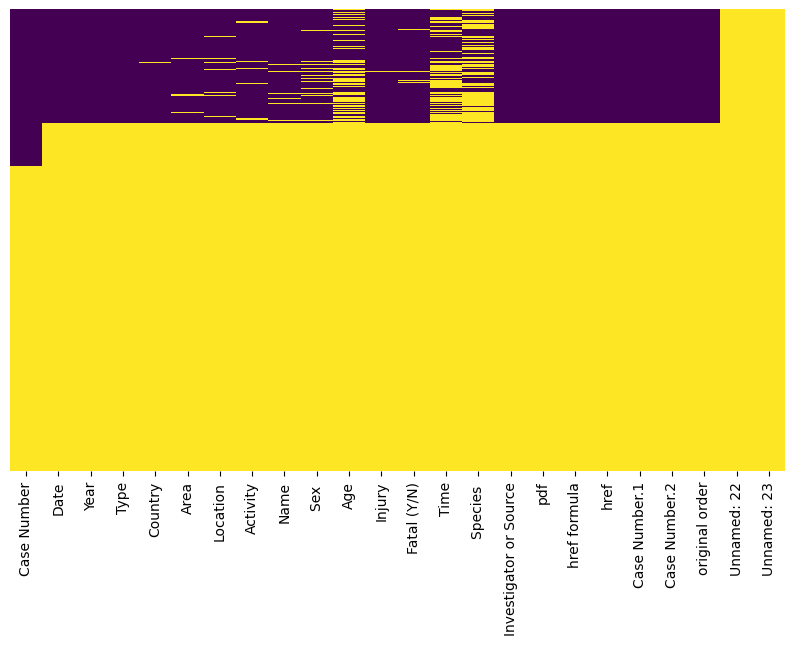

In [102]:
plt.figure(figsize=(10, 6))  # inicia la figura y establece tamaño

sns.heatmap(df_original.isna(),  # mapa de calor
           yticklabels=False,
           cmap='viridis',
           cbar=False)

plt.show()

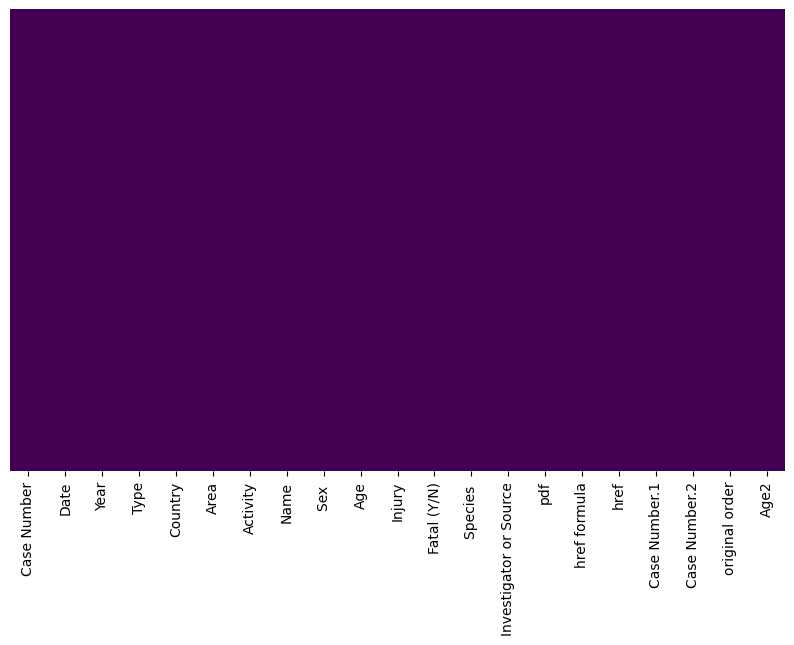

In [103]:
plt.figure(figsize=(10, 6))  # inicia la figura y establece tamaño

sns.heatmap(df.isna(),  # mapa de calor
           yticklabels=False,
           cmap='viridis',
           cbar=False)

plt.show()

# 5. Limpieza y depuración de los datos existentes.

# 5.1 Columna "Case Number".

Ahora inicio el proceso de limpieza de datos, que sigue a la eliminación de los valores nulos. 

Comenzaré con la columna "Case Number." En este caso, he optado por eliminar los caracteres adicionales ("a," "b," "c," "d," y "R") que a veces acompañan a los valores de esta columna. 

La razón detrás de esta decisión radica en que, aunque la información que aportan estos caracteres es relevante, pues nos indican la existencia de múltiples incidentes en el mismo día (distinguidos por letras); o el hecho de que el caso ha sido reportado ("R"), la información ya está recogida en otras columnas. 

Así, la información sobre múltiples incidentes en un mismo día ya está registrada mediante la fecha, y la información acerca de cuando ha sido reportado el caso está disponible en la siguiente columna ("Date"), por lo que estos detalles adicionales no son relevantes para nuestro análisis de los datos y el eliminarlos aportará una mayor comodidad en el manejo de los mismos.

In [104]:
#df["Case Number"].unique()

In [105]:
df["Case Number"] = df["Case Number"].str.replace(r'\.[abcdR]$', '', regex=True) # Utlizo Regex para eliminar los ya mencionados caracteres adicionales.

In [106]:
df.head(10)

,Case Number,Date,Year,Type,Country,Area,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Age2
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,57.00
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,Shark,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,11.00
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,Shark,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,48.00
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Surfing,male,M,0,Minor injury to lower leg,N,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,27.39
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,Free diving,Gustavo Ramos,M,0,Lacerations to leg & hand shark PROVOKED INCIDENT,N,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,27.39
5,2018.06.03,03-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Kite surfing,Chris,M,0,"No injury, board bitten",N,Shark,"Daily Telegraph, 6/4/2018",2018.06.03.b-FlatRock.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.03.b,2018.06.03.b,6298.0,27.39
6,2018.06.03,03-Jun-2018,2018.0,Unprovoked,BRAZIL,Pernambuco,Swimming,Jose Ernesto da Silva,M,18,FATAL,Y,Tiger shark,"Diario de Pernambuco, 6/4/2018",2018.06.03.a-daSilva.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.03.a,2018.06.03.a,6297.0,18.00
7,2018.05.27,27-May-2018,2018.0,Unprovoked,USA,Florida,Fishing,male,M,52,Minor injury to foot. PROVOKED INCIDENT,N,"Lemon shark, 3'","K. McMurray, TrackingSharks.com",2018.05.27-Ponce.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.05.27,2018.05.27,6296.0,52.00
8,2018.05.26,26-May-2018,2018.0,Unprovoked,USA,Florida,Walking,Cody High,M,15,Lower left leg bitten,N,"Bull shark, 6'","K.McMurray, TrackingSharks.com",2018.05.26.b-High.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.05.26.b,2018.05.26.b,6295.0,15.00
9,2018.05.26,26-May-2018,2018.0,Unprovoked,USA,Florida,Standing,male,M,12,Minor injury to foot,N,Shark,"K. McMurray, Tracking Sharks.com",2018.05.26.a-DaytonaBeach.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.05.26.a,2018.05.26.a,6294.0,12.00


# 5.2 Columna "Year".

In [107]:
df.Year.unique()

array([2018.0, 2017.0, '2017', 2016.0, 2015.0, 2014.0, 2013.0, 2012.0,
       2011.0, 2010.0, 2009.0, 2008.0, 2007.0, 2006.0, 2005.0, 2004.0,
       2003.0, 2002.0, 2001.0, 2000.0, 1999.0, 1998.0, 1997.0, 1996.0,
       1995.0, 1984.0, 1994.0, 1993.0, 1992.0, 1991.0, 1990.0, 1989.0,
       1969.0, 1988.0, 1987.0, 1986.0, 1985.0, 1983.0, 1982.0, 1981.0,
       1980.0, 1979.0, 1978.0, 1977.0, 1976.0, 1975.0, 1974.0, 1973.0,
       1972.0, 1971.0, 1970.0, 1968.0, 1967.0, 1966.0, 1965.0, 1964.0,
       1963.0, 1962.0, 1961.0, 1960.0, 1959.0, 1958.0, 1957.0, 1956.0,
       1955.0, 1954.0, 1953.0, 1952.0, 1951.0, 1950.0, 1949.0, 1948.0,
       1848.0, 1947.0, 1946.0, 1945.0, 1944.0, 1943.0, 1942.0, 1941.0,
       1940.0, 1939.0, 1938.0, 1937.0, 1936.0, 1935.0, 1934.0, 1933.0,
       1932.0, 1931.0, 1930.0, 1929.0, 1928.0, 1927.0, 1926.0, 1925.0,
       1924.0, 1923.0, 1922.0, 1921.0, 1920.0, 1919.0, 1918.0, 1917.0,
       1916.0, 1915.0, 1914.0, 1913.0, 1912.0, 1911.0, 1910.0, 1909.0,
      

Al realizar una inspección minuciosa de los datos en esta columna, se evidencia la presencia de valores poco verosímiles, como los años: 500, 77, 5 o 0. 

Es evidente que estos son el resultado de errores o confusiones, y su inclusión podría resultar perjudicial para el análisis posterior. Por lo tanto, considero que la decisión más apropiada es eliminar estos valores.

In [108]:
años = [500.0, 77.0, 5.0, 0.0]

In [109]:
df["Year"].isin(años)
indices_años_inverosimiles = df[df["Year"].isin(años)].index
indices_años_inverosimiles

Int64Index([6174, 6175, 6176, 6177, 6178, 6179, 6180, 6181, 6182, 6183,
            ...
            6292, 6293, 6294, 6295, 6296, 6297, 6298, 6299, 6300, 6301],
           dtype='int64', length=117)

In [110]:
df.drop(indices_años_inverosimiles, inplace = True)

A continuación, procedo a convertir estos valores al formato entero (integer) con el propósito de que puedan ser utilizados en operaciones numéricas más adelante.

In [111]:
df["Year"] = df["Year"].astype(int)

In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5556 entries, 0 to 6173
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Case Number             5556 non-null   object 
 1   Date                    5556 non-null   object 
 2   Year                    5556 non-null   int64  
 3   Type                    5556 non-null   object 
 4   Country                 5556 non-null   object 
 5   Area                    5556 non-null   object 
 6   Activity                5556 non-null   object 
 7   Name                    5556 non-null   object 
 8   Sex                     5556 non-null   object 
 9   Age                     5556 non-null   object 
 10  Injury                  5556 non-null   object 
 11  Fatal (Y/N)             5556 non-null   object 
 12  Species                 5556 non-null   object 
 13  Investigator or Source  5556 non-null   object 
 14  pdf                     5556 non-null   

# 5.3 Columna "Type".

In [113]:
df.Type.unique()

array(['Boating', 'Unprovoked', 'Invalid', 'Provoked', 'Questionable',
       'Unknown', 'Boat', 'Sea Disaster', 'Boatomg'], dtype=object)

Al examinar los datos en esta columna, se observa la existencia de valores que parecen haber surgido, también, como fruto de errores ortográficos o de otra clase. Resulta claro que las palabras "Boat" y "Boatomg" pretenden referirse a lo mismo que "Boating," por lo que procederé a unificar estos tres valores en uno solo. 

En cuanto al resto de los datos presentes, se mantendrán sin modificaciones.

In [114]:
df = df.replace(["Boat","Boatomg"], "Boating")

In [115]:
df.Type.unique()

array(['Boating', 'Unprovoked', 'Invalid', 'Provoked', 'Questionable',
       'Unknown', 'Sea Disaster'], dtype=object)

# 5.4 Columna "Country".

In [116]:
df.Country.unique()


array(['USA', 'AUSTRALIA', 'MEXICO', 'BRAZIL', 'ENGLAND', 'SOUTH AFRICA',
       'THAILAND', 'COSTA RICA', 'MALDIVES', 'BAHAMAS', 'ECUADOR',
       'NEW CALEDONIA', 'MALAYSIA', 'CUBA', 'MAURITIUS', 'NEW ZEALAND',
       'SPAIN', 'SAMOA', 'SOLOMON ISLANDS', 'JAPAN', 'EGYPT',
       'ST HELENA, British overseas territory', 'REUNION',
       'FRENCH POLYNESIA', 'UNITED KINGDOM', 'UNITED ARAB EMIRATES',
       'PHILIPPINES', 'INDONESIA', 'CHINA', 'COLUMBIA', 'CAPE VERDE',
       'Fiji', 'DOMINICAN REPUBLIC', 'CAYMAN ISLANDS', 'ARUBA',
       'MOZAMBIQUE', 'FIJI', 'PUERTO RICO', 'ITALY', 'ST. MARTIN',
       'FRANCE', 'PAPUA NEW GUINEA', 'TRINIDAD & TOBAGO', 'KIRIBATI',
       'ISRAEL', 'DIEGO GARCIA', 'TAIWAN', 'JAMAICA',
       'PALESTINIAN TERRITORIES', 'GUAM', 'SEYCHELLES', 'BELIZE',
       'NIGERIA', 'TONGA', 'SCOTLAND', 'CANADA', 'SAUDI ARABIA', 'CHILE',
       'ANTIGUA', 'KENYA', 'RUSSIA', 'TURKS & CAICOS',
       'UNITED ARAB EMIRATES (UAE)', 'AZORES', 'SOUTH KOREA', 'MALTA',
      

Al analizar los valores en esta columna, se aprecia una amplia variedad de errores que abarcan desde entradas que no corresponden a países hasta errores de escritura o la presencia de caracteres como signos de interrogación. En resumen, la columna carece de uniformidad en sus datos.

Dada esta variedad de errores, la única solución que que he identificado para abordarlos es hacerlo en cada caso de manera individual y aplicar las correcciones pertinentes según el error.

Por otro lado, habrá algunos valores que simplmente eliminaré de forma inmediata (especialmente aquellos que no corresponden a ningún país del mundo). Cabe destacar que estos casos no superan un total de cuatro.

In [117]:
df = df.replace(["ENGLAND","ST HELENA, British overseas territory"], "UNITED KINGDOM")
df = df.replace(["ST HELENA, British overseas territory"], "ST. HELENA, BRITISH OVERSEAS TERRITORY")
df = df.replace(["Fiji"], "FIJI")
df = df.replace(["GUAM",""], "USA")
df = df.replace(["NEVIS"], "ST. KITTS AND NEVIS")
df = df.replace(["Sierra Leone"], "SIERRA LEONE")
df = df.replace(["ST. MAARTIN"], "ST. MARTIN")
df = df.replace(["SUDAN?"], "SUDAN")
df = df.replace(["REUNION"], "REUNION ISLAND")
df = df.replace(["INDIAN OCEAN?"], "INDIAN OCEAN")
df = df.replace(["INDIAN OCEAN?"], "INDIAN OCEAN")
df = df.replace(["Coast of AFRICA?"], "COAST OF AFRICA")
df = df.replace(["Between PORTUGAL & INDIA"], " PORTUGAL / INDIA")
df = df.replace(["RED SEA?"], "RED SEA")
df = df.replace(["ASIA?"], "ASIA")
df = df.replace(["CEYLON (SRI LANKA)"], "SRI LANKA")
df = df.replace(["ANTARTICA"], "ANTARTIC CIRCLE")
df = df.replace(["PUERTO RICO"], "USA")
df = df.replace(["MACAU", "HONG KONG"], "CHINA")
df = df.replace(["FRENCH POLYNESIA", "NEW CALEDONIA"], "FRANCE (OVERSEAS COLLECTIVITY)")
df = df.replace(["WESTERN SAHARA"], "NORTH AFRICA")
df = df.replace(["GREENLAND"], "KINGDOM OF DENMARK")
df = df.replace(["ARUBA"], "KINGDOM OF THE NETHERLANDS")
df = df.replace(["DIEGO GARCIA"], "INDIAN OCEAN")
df = df.replace(["GREECE/ITALY"], "GREECE / ITALY")
df = df.replace(["Seychelles"], "SEYCHELLES")
df = df.replace([" TONGA"], "TONGA")
df = df.replace([" PORTUGAL / INDIA"], "PORTUGAL / INDIA")
df = df.replace(["  PHILIPPINES"], "PHILIPPINES")
df = df.replace(["AMERICAN SAMOA"], "USA")
df = df.replace(["COLUMBIA"], "USA")


In [118]:
countries_eliminar = ["ASIA", "OCEAN", "Coast of AFRICA", "AFRICA"] 

In [119]:
df["Country"].isin(countries_eliminar)
indices_countries_eliminar = df[df["Country"].isin(countries_eliminar)].index
indices_countries_eliminar

Int64Index([5748, 6049, 6059], dtype='int64')

In [120]:
df.drop(indices_countries_eliminar, axis=0, inplace=True)

In [121]:
df.Country.unique()

array(['USA', 'AUSTRALIA', 'MEXICO', 'BRAZIL', 'UNITED KINGDOM',
       'SOUTH AFRICA', 'THAILAND', 'COSTA RICA', 'MALDIVES', 'BAHAMAS',
       'ECUADOR', 'FRANCE (OVERSEAS COLLECTIVITY)', 'MALAYSIA', 'CUBA',
       'MAURITIUS', 'NEW ZEALAND', 'SPAIN', 'SAMOA', 'SOLOMON ISLANDS',
       'JAPAN', 'EGYPT', 'REUNION ISLAND', 'UNITED ARAB EMIRATES',
       'PHILIPPINES', 'INDONESIA', 'CHINA', 'CAPE VERDE', 'FIJI',
       'DOMINICAN REPUBLIC', 'CAYMAN ISLANDS',
       'KINGDOM OF THE NETHERLANDS', 'MOZAMBIQUE', 'ITALY', 'ST. MARTIN',
       'FRANCE', 'PAPUA NEW GUINEA', 'TRINIDAD & TOBAGO', 'KIRIBATI',
       'ISRAEL', 'INDIAN OCEAN', 'TAIWAN', 'JAMAICA',
       'PALESTINIAN TERRITORIES', 'SEYCHELLES', 'BELIZE', 'NIGERIA',
       'TONGA', 'SCOTLAND', 'CANADA', 'SAUDI ARABIA', 'CHILE', 'ANTIGUA',
       'KENYA', 'RUSSIA', 'TURKS & CAICOS', 'UNITED ARAB EMIRATES (UAE)',
       'AZORES', 'SOUTH KOREA', 'MALTA', 'VIETNAM', 'MADAGASCAR',
       'PANAMA', 'SOMALIA', 'ST. KITTS AND NEVIS', 'CROATI

In [122]:
#df["Country"].value_counts()[100:150]

Me veo ahora en la necesidad de modificar el nombre de la columna, ya que entre los valores permitidos se encuentran algunos que corresponden a mares y océanos. Por lo tanto, la columna será renombrada como "Country, ocean or sea".

In [123]:
df = df.rename(columns={"Country": "Country, ocean or sea"})

In [124]:
df.head()

,Case Number,Date,Year,Type,"Country, ocean or sea",Area,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Age2
0,2018.06.25,25-Jun-2018,2018,Boating,USA,California,Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,57.00
1,2018.06.18,18-Jun-2018,2018,Unprovoked,USA,Georgia,Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,Shark,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,11.00
2,2018.06.09,09-Jun-2018,2018,Invalid,USA,Hawaii,Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,Shark,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,48.00
3,2018.06.08,08-Jun-2018,2018,Unprovoked,AUSTRALIA,New South Wales,Surfing,male,M,0,Minor injury to lower leg,N,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,27.39
4,2018.06.04,04-Jun-2018,2018,Provoked,MEXICO,Colima,Free diving,Gustavo Ramos,M,0,Lacerations to leg & hand shark PROVOKED INCIDENT,N,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,27.39


# 5.5 Columna "Activity".

Para llevar a cabo la limpieza de esta columna, he decidido implementar un enfoque genérico. Consiste en desarrollar una función que contenga condicionales específicos para cada una de las actividades que voy a aceptar en la columna. 

De esta manera, todas las celdas que cumplan con un número predefinido de caracteres serán asignadas a una actividad particular, mientras que otro conjunto de caracteres se asociará con una actividad diferente. 

Esto me permitirá categorizar la columna en un número reducido de actividades distintas, evitando las strings que había al comienzo y que carecen de valor o significado sustantivo.

In [125]:
np.set_printoptions(threshold=np.inf)

In [126]:
pd.set_option("display.max_columns", None)

In [127]:
df.Activity.value_counts().head()

Surfing         937
Swimming        827
Unknown         362
Fishing         328
Spearfishing    315
Name: Activity, dtype: int64

In [128]:
def limpiar_activity(x):
    
    if 'shing' in x:
        return 'Fishing'
    elif 'urf' in x:
        return 'Surfing'
    elif 'wim' in x:
        return 'Swimming'
    elif 'thin' in x:
        return 'Bathing'
    elif 'adin' in x:
        return 'Wading'
    elif 'ivin' in x:
        return 'Diving'
    elif 'tand' in x:
        return 'Standing'
    elif 'nork' in x:
        return 'Snorkeling'
    elif 'ody div' in x:
        return 'Scuba diving'
    elif 'ody board' in x:
        return 'Body boarding'
    elif 'ayak' in x:
        return 'Kayaking'
    else:
        return 'Unknown'
    

In [129]:
df.Activity = df.Activity.apply(limpiar_activity)

In [130]:
df.Activity.value_counts()

Surfing          1186
Unknown          1178
Swimming         1040
Fishing          1004
Diving            454
Wading            198
Bathing           173
Standing          133
Snorkeling         90
Body boarding      62
Kayaking           35
Name: Activity, dtype: int64

# 5.6 Columna "Name".

In [131]:
df["Name"].value_counts()

male                502
female               95
Unknown              62
boy                  20
2 males              15
                   ... 
Danny Thorpe          1
George Lyons          1
Chris Hogan           1
Daniel MacDonald      1
Indian slave          1
Name: Name, Length: 4748, dtype: int64

En esta columna, he seguido el mismo procedimiento aplicado en las anteriores, que consiste en examinar los valores únicos de la columna y determinar cual tiene sentido dejar y cual no. Aquellos valores que carezcan de un significado claro en el contexto que estamos examinando, serán eliminados o reemplazados por otro valor.

En este caso, se observa que la columna que estamos analizando debe contener exclusivamente nombres de personas, excluyendo otros valores como "male" o "female", que son nombres comunes (diferenciandose de forma categórica de los nombres comunes). Por lo tanto, mi intención es la de eliminar de manera individual estos valores.

In [132]:
df['Name'] = df['Name'].replace(['male', 'female', "boy", "2 males", "boat", "child", "Anonymous", "sailor", "males", "a sailor", "girl", "Unidentified", "a pearl diver", "fisherman", "a native", "a soldier", "Arab boy", "2 fishermen", "black male", " male", "Zulu male", "native boy", "aboriginal male", "Japanese diver", "unknown", "Russian male", "2 women", "M.C.", "woman", "dinghy", "soldier", "teen", "Japanese fisherman", "a native fisherman", "a school teacher", "Fijian girl", "Indian male", "a pilot", "3 males", "12' dinghy", "a local dignitary", "American male", "Indian female", "2 men", "fishermen native", " 2 males", "a youth", "crew", "soldier"], "Unknown")

Llegados a este punto, puede observarse que aún sigue habiendo valores que no tienen cabida en esta columna y que deberían ser reemplazados por la etiqueta "Unknown". Sin embargo, por el momento, lo dejaré así para pasar al siguiente punto.

In [133]:
df["Name"].value_counts().head()

Unknown          809
Andre Hartman      3
John Williams      3
Davies             2
Ali                2
Name: Name, dtype: int64

In [134]:
df["Name"].nunique()


4706

In [135]:
df.head()

,Case Number,Date,Year,Type,"Country, ocean or sea",Area,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Age2
0,2018.06.25,25-Jun-2018,2018,Boating,USA,California,Unknown,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,57.00
1,2018.06.18,18-Jun-2018,2018,Unprovoked,USA,Georgia,Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,Shark,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,11.00
2,2018.06.09,09-Jun-2018,2018,Invalid,USA,Hawaii,Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,Shark,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,48.00
3,2018.06.08,08-Jun-2018,2018,Unprovoked,AUSTRALIA,New South Wales,Surfing,Unknown,M,0,Minor injury to lower leg,N,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,27.39
4,2018.06.04,04-Jun-2018,2018,Provoked,MEXICO,Colima,Diving,Gustavo Ramos,M,0,Lacerations to leg & hand shark PROVOKED INCIDENT,N,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,27.39


# 5.7 Columna "Fatal (Y/N)".

In [136]:
df["Fatal (Y/N)"].value_counts()

N          4271
Y          1244
UNKNOWN      29
 N            7
M             1
2017          1
Name: Fatal (Y/N), dtype: int64

Siguiendo el mismo procedimiento aplicado en casos anteriores, he llevado a cabo un análisis de los valores únicos en la columna con el fin de discernir cuáles debían considerarse como correctos y cuáles no. 

Durante este proceso, se identificaron dos valores que claramente no guardaban relación con la columna, a saber, "M" y "2017," por lo que se procedió a su eliminación. Además, se detectaron siete valores en los que la letra "N" presentaba un espaciado, los cuales también fueron reemplazados por este mismo valorpero sin el espaciado. Por último, se confirmó que el resto de los valores se ajustaban al propósito de la columna, que debería contener exclusivamente tres valores: "N," "Y" y "UNKNOWN."

De acuerdo con lo expuesto: 

In [137]:
df["Fatal (Y/N)"] = df["Fatal (Y/N)"].replace([" N"], "N")

In [138]:
df["Fatal (Y/N)"] = df["Fatal (Y/N)"].replace(["M", "2017"], "UNKNOWN")

In [139]:
df["Fatal (Y/N)"].value_counts()

N          4278
Y          1244
UNKNOWN      31
Name: Fatal (Y/N), dtype: int64

# 5.8 Columna "Species".

In [140]:
df.head()

,Case Number,Date,Year,Type,"Country, ocean or sea",Area,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Age2
0,2018.06.25,25-Jun-2018,2018,Boating,USA,California,Unknown,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,57.00
1,2018.06.18,18-Jun-2018,2018,Unprovoked,USA,Georgia,Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,Shark,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,11.00
2,2018.06.09,09-Jun-2018,2018,Invalid,USA,Hawaii,Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,Shark,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,48.00
3,2018.06.08,08-Jun-2018,2018,Unprovoked,AUSTRALIA,New South Wales,Surfing,Unknown,M,0,Minor injury to lower leg,N,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,27.39
4,2018.06.04,04-Jun-2018,2018,Provoked,MEXICO,Colima,Diving,Gustavo Ramos,M,0,Lacerations to leg & hand shark PROVOKED INCIDENT,N,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,27.39


In [141]:
df["Species "].value_counts().head()

Shark                                                 2465
White shark                                            139
Invalid                                                 87
Shark involvement prior to death was not confirmed      84
Shark involvement not confirmed                         77
Name: Species , dtype: int64

En el caso de esta columna, he aplicado criterios más rigurosos para su modificación. 

En primer lugar, considerando que el objetivo de este DataFrame es analizar los ataques de tiburones a nivel global, he determinado que todas las filas en las que existiera incertidumbre acerca de si el ataque fue realizado por un tiburón o en caso de no disponerse de información suficiente para saberlo, debían ser eliminadas, ya que no aportarían un valor significativo a la investigación.

Para llevar a cabo esta eliminación, he realizado un análisis de los diferentes valores presentes en la columna y he identificado que todas las celdas que contenían las palabras "Not", "not", "Unconfirmed", "unconfirmed", "Questionable", "questionable," "No", o "no," debían ser excluidas.

En una segunda etapa, dado que los datos restantes se refieren exclusivamente a ataques de tiburones, he optado por simplificar la información, centrándome en la etiqueta "Shark Involved" para unificar todos los valores bajo esta única categoría. Este enfoque permitirá una representación más clara y coherente de los datos en el análisis subsiguiente.

In [142]:
palabras_clave = ["Not", "not", "Unconfirmed", "unconfirmed", "Questionable", "questionable" "No", "no"]

In [143]:
df.head()

,Case Number,Date,Year,Type,"Country, ocean or sea",Area,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Age2
0,2018.06.25,25-Jun-2018,2018,Boating,USA,California,Unknown,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,57.00
1,2018.06.18,18-Jun-2018,2018,Unprovoked,USA,Georgia,Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,Shark,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,11.00
2,2018.06.09,09-Jun-2018,2018,Invalid,USA,Hawaii,Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,Shark,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,48.00
3,2018.06.08,08-Jun-2018,2018,Unprovoked,AUSTRALIA,New South Wales,Surfing,Unknown,M,0,Minor injury to lower leg,N,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,27.39
4,2018.06.04,04-Jun-2018,2018,Provoked,MEXICO,Colima,Diving,Gustavo Ramos,M,0,Lacerations to leg & hand shark PROVOKED INCIDENT,N,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,27.39


In [144]:
indices = df[df["Species "].str.contains('|'.join(palabras_clave))].index
indices

Int64Index([  16,   20,   31,   44,   79,  115,  153,  159,  189,  195,
            ...
            5989, 6012, 6014, 6035, 6037, 6046, 6078, 6111, 6126, 6164],
           dtype='int64', length=336)

In [145]:
df = df.drop(indices)

In [146]:
df["Species "].value_counts().head()

Shark          2465
White shark     139
Invalid          87
Tiger shark      66
Bull shark       46
Name: Species , dtype: int64

Así, me parecía también necesario el cambio del nombre de la columna, pues ya no consistiría en la especificación de la especie y característics del tiburón sino únicamente en la afirmación de que lo había sido.

In [147]:
df["Species "] = "Shark involved"

In [148]:
df["Species "].value_counts().head()

Shark involved    5217
Name: Species , dtype: int64

In [149]:
df = df.rename(columns={"Species ": "Animal involved"})

In [150]:
df.head()

,Case Number,Date,Year,Type,"Country, ocean or sea",Area,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Animal involved,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Age2
0,2018.06.25,25-Jun-2018,2018,Boating,USA,California,Unknown,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,Shark involved,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,57.00
1,2018.06.18,18-Jun-2018,2018,Unprovoked,USA,Georgia,Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,Shark involved,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,11.00
2,2018.06.09,09-Jun-2018,2018,Invalid,USA,Hawaii,Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,Shark involved,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,48.00
3,2018.06.08,08-Jun-2018,2018,Unprovoked,AUSTRALIA,New South Wales,Surfing,Unknown,M,0,Minor injury to lower leg,N,Shark involved,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,27.39
4,2018.06.04,04-Jun-2018,2018,Provoked,MEXICO,Colima,Diving,Gustavo Ramos,M,0,Lacerations to leg & hand shark PROVOKED INCIDENT,N,Shark involved,A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,27.39


In [151]:
df.shape

(5217, 21)

In [152]:
#Volvemos a comprobar duplicados:

df.duplicated().any()

False

# 6. Breve análisis de los datos obtenidos (esto lo dejo para estudios posteriores)

Mi enfoque principal al llevar a cabo este proyecto no se ha centrado en la obtención de resultados específicos para el análisis de un conjunto particular de variables. Más bien, mi objetivo primordial ha sido el de realizar una limpieza, columna a columna, de los datos proporcionados (en un intento de que fuera integral y exhaustiva). 

La fase de limpieza de datos ha sido el núcleo central o eje vertebrador del trabajo, pues mi intención, más allá de la obtención de resultados específicos, ha sido la de "preparar" los datos de manera que sean aptos para su uso en diversos estudios, independientemente de los objetivos que se quieran alcanzar. Es decir, para analizar las relaciones o discrepancias entre todas las variables disponibles (aunque, por supuesto, algunos datos como el nombre de la fuente u otros de naturaleza similar no me han parecido tan relevantes como otros).

Por lo tanto, concluyo aquí con lo que sería el tronco del proyecto, la  parte central del mismo. Sin embargo, cabe destacar que al observar los datos resultantes, se manifiestan diversas evidencias que podrían resultar interesantes para futuros trabajos. A continuación, intentaré presentar de manera superficial algunas de estas observaciones, resaltando que podrían ser valiosas para investigaciones posteriores.

In [153]:
df.head()

,Case Number,Date,Year,Type,"Country, ocean or sea",Area,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Animal involved,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Age2
0,2018.06.25,25-Jun-2018,2018,Boating,USA,California,Unknown,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,Shark involved,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,57.00
1,2018.06.18,18-Jun-2018,2018,Unprovoked,USA,Georgia,Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,Shark involved,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,11.00
2,2018.06.09,09-Jun-2018,2018,Invalid,USA,Hawaii,Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,Shark involved,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,48.00
3,2018.06.08,08-Jun-2018,2018,Unprovoked,AUSTRALIA,New South Wales,Surfing,Unknown,M,0,Minor injury to lower leg,N,Shark involved,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,27.39
4,2018.06.04,04-Jun-2018,2018,Provoked,MEXICO,Colima,Diving,Gustavo Ramos,M,0,Lacerations to leg & hand shark PROVOKED INCIDENT,N,Shark involved,A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,27.39


In [154]:
df.shape

(5217, 21)

In [156]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,5217.0,1969.071880,47.149709,1543.0,1947.0,1983.00,2006.00,2018.0
original order,5217.0,3296.989266,1796.477750,130.0,1730.0,3352.00,4873.00,6303.0
Age2,5217.0,27.348108,10.719952,1.0,21.0,27.39,27.39,87.0


In [157]:
df.describe(include='object').T

,count,unique,top,freq
Case Number,5217,4534,1923.00.00,4
Date,5217,4560,1941,7
Type,5217,6,Unprovoked,4263
"Country, ocean or sea",5217,174,USA,1989
Area,5217,800,Florida,945
Activity,5217,11,Surfing,1157
Name,5217,4446,Unknown,734
Sex,5217,2,M,4640
Age,5217,142,0,1980
Injury,5217,3057,FATAL,692


In [158]:
df['Year'].describe().T

count    5217.000000
mean     1969.071880
std        47.149709
min      1543.000000
25%      1947.000000
50%      1983.000000
75%      2006.000000
max      2018.000000
Name: Year, dtype: float64

In [161]:
grupos_años = ["1500-1700", "1700-1900", "1900-2000", "2000-2018"]
bins = [1500, 1700, 1900, 2000, 2018] 


df['Year_ranges'] = pd.cut(df['Year'], bins=bins, labels=grupos_años)


In [162]:
df['Year_ranges'] = df['Year_ranges'].astype(str)

(array([1785., 2937.,  488.,    7.]),
 array([0.  , 0.75, 1.5 , 2.25, 3.  ]),
 <BarContainer object of 4 artists>)

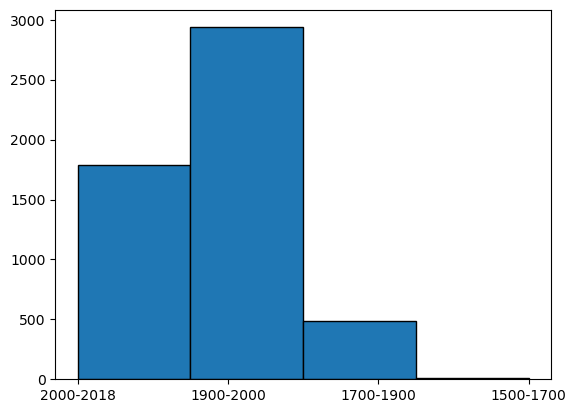

In [163]:
plt.hist(df['Year_ranges'], bins=4, edgecolor='k')

In [164]:
grupos_edad = ["1-15", "15-30", "30-45", "45-60", "60-75", "75-90"]
bins = [1, 15, 30, 45, 60, 75, 90]  


df['Age2_ranges'] = pd.cut(df['Age2'], bins=bins, labels=grupos_edad)



In [165]:
df.head()

,Case Number,Date,Year,Type,"Country, ocean or sea",Area,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Animal involved,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Age2,Year_ranges,Age2_ranges
0,2018.06.25,25-Jun-2018,2018,Boating,USA,California,Unknown,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,Shark involved,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,57.00,2000-2018,45-60
1,2018.06.18,18-Jun-2018,2018,Unprovoked,USA,Georgia,Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,Shark involved,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,11.00,2000-2018,1-15
2,2018.06.09,09-Jun-2018,2018,Invalid,USA,Hawaii,Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,Shark involved,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,48.00,2000-2018,45-60
3,2018.06.08,08-Jun-2018,2018,Unprovoked,AUSTRALIA,New South Wales,Surfing,Unknown,M,0,Minor injury to lower leg,N,Shark involved,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,27.39,2000-2018,15-30
4,2018.06.04,04-Jun-2018,2018,Provoked,MEXICO,Colima,Diving,Gustavo Ramos,M,0,Lacerations to leg & hand shark PROVOKED INCIDENT,N,Shark involved,A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,27.39,2000-2018,15-30


In [166]:
df['Age2_ranges'] = df['Age2_ranges'].astype(str)

(array([ 300.,  569., 3623.,  643.,   71.,   11.]),
 array([0., 1., 2., 3., 4., 5., 6.]),
 <BarContainer object of 6 artists>)

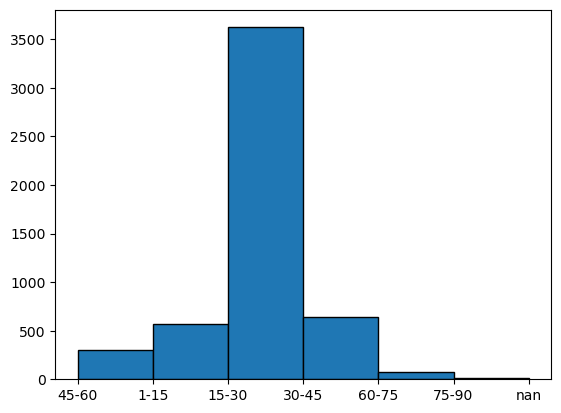

In [167]:
plt.hist(df['Age2_ranges'], bins=6, edgecolor='k')

(array([ 577., 4640.]),
 array([0. , 0.5, 1. ]),
 <BarContainer object of 2 artists>)

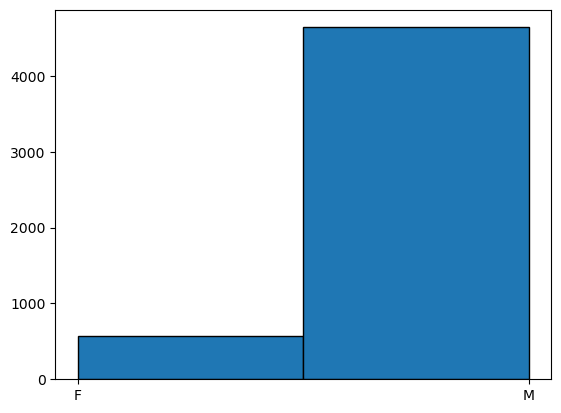

In [170]:
plt.hist(df['Sex '], bins=2, edgecolor='k')

# 7. Algunas conclusiones pertinentes.

En esta fase del proyecto, he creado dos nuevas columnas que representan rangos de años y edades con el propósito de facilitar la visualización de datos a través de histogramas. Esto nos permite identificar tendencias y patrones más claramente.

Por ejemplo, al observar los histogramas, podemos destacar que existe un período de años en los que se han producido más accidentes. Asimismo, al analizar el rango de edades en los que se registran la mayoría de los incidentes, podemos obtener información relevante sobre los grupos de edad más afectados por los ataques de tiburones y puede ayudarnos a identificar posibles tendencias. Además, al considerar el género, notamos que los ataques son más frecuentes en individuos de sexo masculino.

Tras este proyecto de limpieza de un dataframe, he podido darme cuenta de que desempeña un papel fundamental en la preparación de datos para estudios estadísticos futuros, pues es realmente lo que  garantiza la calidad de los mismos, lo que a su vez tiene un impacto inmediato en la validez de los resultados y es lo que, en última instancia, hace que de algún modo u otro, podamos estar más o menos seguros y confíar en los resultados de investigaciones estadísticas.
